# Librerias

# Roberto Lacayo

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [33]:
df = pd.read_excel("AirlinePassengerExercise.xlsx", index_col='Date', parse_dates=True)

In [34]:
df = df.dropna()

In [35]:
df.head()

,Year,Month,Passengers,trend
Date,,,,
1949-01-01,1949,1,112.0,124.477715
1949-02-01,1949,2,118.0,125.758071
1949-03-01,1949,3,132.0,126.925837
1949-04-01,1949,4,129.0,128.231374
1949-05-01,1949,5,121.0,129.507581


## Prepare for Prophet

In [36]:
df2 = df.reset_index()

In [37]:
df2.head()

,Date,Year,Month,Passengers,trend
0,1949-01-01,1949,1,112.0,124.477715
1,1949-02-01,1949,2,118.0,125.758071
2,1949-03-01,1949,3,132.0,126.925837
3,1949-04-01,1949,4,129.0,128.231374
4,1949-05-01,1949,5,121.0,129.507581


In [38]:
df2 = df2.rename(columns={'Date':'ds', 'Passengers':'y'})

In [39]:
df2.head()

,ds,Year,Month,y,trend
0,1949-01-01,1949,1,112.0,124.477715
1,1949-02-01,1949,2,118.0,125.758071
2,1949-03-01,1949,3,132.0,126.925837
3,1949-04-01,1949,4,129.0,128.231374
4,1949-05-01,1949,5,121.0,129.507581


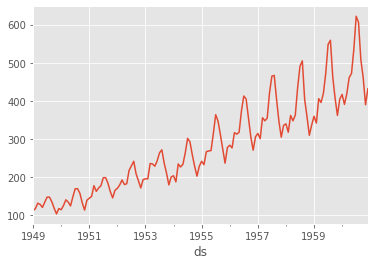

In [40]:
df2.set_index('ds').y.plot()

In [41]:
df2['y'] = np.log(df2['y'])

In [42]:
df2.tail()

,ds,Year,Month,y,trend
139,1960-08-01,1960,8,6.406880,502.942048
140,1960-09-01,1960,9,6.230481,508.115222
141,1960-10-01,1960,10,6.133398,513.172176
142,1960-11-01,1960,11,5.966147,518.450575
143,1960-12-01,1960,12,6.068426,523.610391


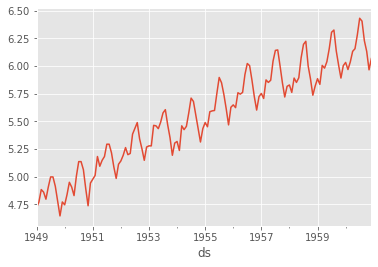

In [43]:
df2.set_index('ds').y.plot()

# Running Prophet

In [44]:
model = Prophet()
model.fit(df2);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
163,1962-07-31
164,1962-08-31
165,1962-09-30
166,1962-10-31
167,1962-11-30


In [46]:
forecast = model.predict(future)

In [47]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-07-31,6.382073,6.524519,6.670863,6.326348,6.437452,0.212246,0.212246,0.212246,0.212246,0.212246,0.212246,0.0,0.0,0.0,6.594319
164,1962-08-31,6.391266,6.399604,6.551170,6.329716,6.452015,0.086206,0.086206,0.086206,0.086206,0.086206,0.086206,0.0,0.0,0.0,6.477472
165,1962-09-30,6.400162,6.227183,6.390893,6.334201,6.465572,-0.088821,-0.088821,-0.088821,-0.088821,-0.088821,-0.088821,0.0,0.0,0.0,6.311341
166,1962-10-31,6.409355,6.091090,6.257029,6.339350,6.478937,-0.231169,-0.231169,-0.231169,-0.231169,-0.231169,-0.231169,0.0,0.0,0.0,6.178186
167,1962-11-30,6.418251,6.236321,6.408848,6.345297,6.491638,-0.093370,-0.093370,-0.093370,-0.093370,-0.093370,-0.093370,0.0,0.0,0.0,6.324881


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,1962-07-31,6.594319,6.524519,6.670863
164,1962-08-31,6.477472,6.399604,6.551170
165,1962-09-30,6.311341,6.227183,6.390893
166,1962-10-31,6.178186,6.091090,6.257029
167,1962-11-30,6.324881,6.236321,6.408848


# Plotting Prophet results

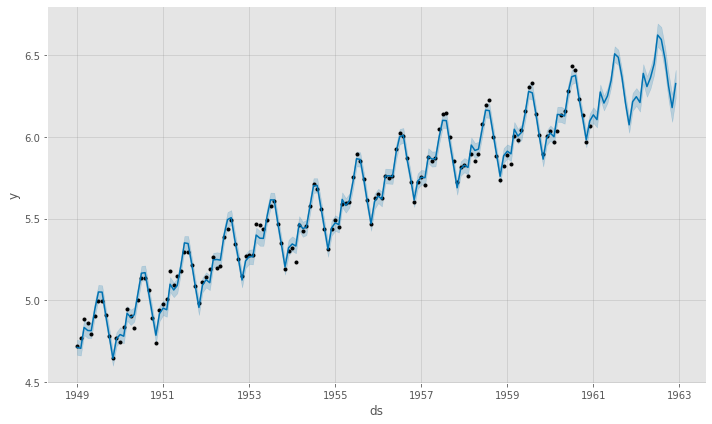

In [49]:
model.plot(forecast);

# Visualizing Prophet models

In [50]:
df2.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [51]:
viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [52]:
viz_df.head()

,Year,Month,Passengers,trend,yhat,yhat_lower,yhat_upper
1949-01-01,1949.0,1.0,112.0,124.477715,4.712282,4.666240,4.758440
1949-02-01,1949.0,2.0,118.0,125.758071,4.706156,4.662420,4.752522
1949-03-01,1949.0,3.0,132.0,126.925837,4.834043,4.787271,4.879392
1949-04-01,1949.0,4.0,129.0,128.231374,4.815340,4.769112,4.861881
1949-05-01,1949.0,5.0,121.0,129.507581,4.814271,4.769196,4.860419


In [53]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [54]:
viz_df.head()

,Year,Month,Passengers,trend,yhat,yhat_lower,yhat_upper,yhat_rescaled
1949-01-01,1949.0,1.0,112.0,124.477715,4.712282,4.666240,4.758440,111.305897
1949-02-01,1949.0,2.0,118.0,125.758071,4.706156,4.662420,4.752522,110.626146
1949-03-01,1949.0,3.0,132.0,126.925837,4.834043,4.787271,4.879392,125.718253
1949-04-01,1949.0,4.0,129.0,128.231374,4.815340,4.769112,4.861881,123.388726
1949-05-01,1949.0,5.0,121.0,129.507581,4.814271,4.769196,4.860419,123.256937


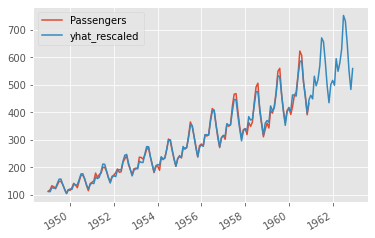

In [55]:
viz_df[['Passengers', 'yhat_rescaled']].plot()

In [56]:
df.index = pd.to_datetime(df.index) #make sure our index as a datetime object
connect_date = df.index[-2] #select the 2nd to last date

In [57]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [58]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1960-12-01,6.202074,6.052682,6.142173,6.202074,6.202074,-0.105038,-0.105038,-0.105038,-0.105038,-0.105038,-0.105038,0.0,0.0,0.0,6.097036
1960-12-31,6.210970,6.084196,6.180170,6.210970,6.210970,-0.077214,-0.077214,-0.077214,-0.077214,-0.077214,-0.077214,0.0,0.0,0.0,6.133756
1961-01-31,6.220163,6.056901,6.151269,6.219855,6.220603,-0.115565,-0.115565,-0.115565,-0.115565,-0.115565,-0.115565,0.0,0.0,0.0,6.104598
1961-02-28,6.228466,6.230234,6.319192,6.226963,6.229909,0.045028,0.045028,0.045028,0.045028,0.045028,0.045028,0.0,0.0,0.0,6.273494
1961-03-31,6.237658,6.160680,6.250436,6.234669,6.240506,-0.031829,-0.031829,-0.031829,-0.031829,-0.031829,-0.031829,0.0,0.0,0.0,6.205829


In [62]:
viz_df = df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [59]:
viz_df.head()

,Year,Month,Passengers,trend,yhat,yhat_lower,yhat_upper,yhat_rescaled
1949-01-01,1949.0,1.0,112.0,124.477715,4.712282,4.666240,4.758440,111.305897
1949-02-01,1949.0,2.0,118.0,125.758071,4.706156,4.662420,4.752522,110.626146
1949-03-01,1949.0,3.0,132.0,126.925837,4.834043,4.787271,4.879392,125.718253
1949-04-01,1949.0,4.0,129.0,128.231374,4.815340,4.769112,4.861881,123.388726
1949-05-01,1949.0,5.0,121.0,129.507581,4.814271,4.769196,4.860419,123.256937


In [60]:
viz_df.tail()

,Year,Month,Passengers,trend,yhat,yhat_lower,yhat_upper,yhat_rescaled
1962-07-31,NaN,NaN,NaN,NaN,6.594319,6.524519,6.670863,730.930917
1962-08-31,NaN,NaN,NaN,NaN,6.477472,6.399604,6.551170,650.325061
1962-09-30,NaN,NaN,NaN,NaN,6.311341,6.227183,6.390893,550.783181
1962-10-31,NaN,NaN,NaN,NaN,6.178186,6.091090,6.257029,482.116364
1962-11-30,NaN,NaN,NaN,NaN,6.324881,6.236321,6.408848,558.291527


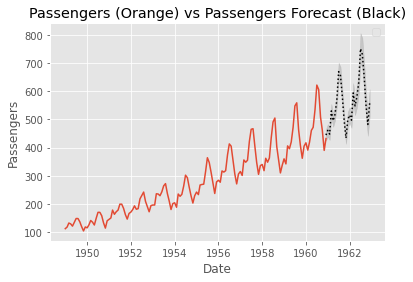

In [63]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.Passengers)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Passengers (Orange) vs Passengers Forecast (Black)')
ax1.set_ylabel('Passengers')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend